In [1]:
import pandas as pd

In [2]:
BHNames= ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
#data_set = pd.read_csv(url,delim_whitespace=True,names=BHNames)
data_set = pd.read_csv('housing data.csv',delim_whitespace=True,names=BHNames)
data_set.head(5) 


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
from sklearn.model_selection import train_test_split

X = data_set.drop('medv', axis = 1)
print('X shape = ',X.shape)

Y = data_set['medv']
print('Y shape = ',Y.shape)


X shape =  (506, 13)
Y shape =  (506,)


In [5]:
from sklearn import linear_model
import matplotlib.pyplot as plt

names = data_set.drop('medv', axis=1).columns
print(names)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')


In [6]:
# For Lasso(L1) Regression
lasso = linear_model.Lasso(alpha=2)


In [7]:
lasso_coef = lasso.fit(X,Y).coef_

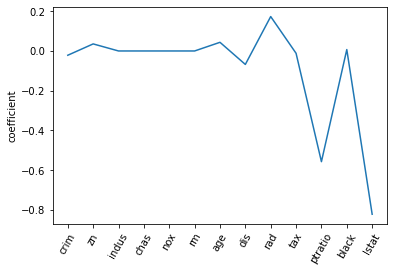

In [8]:
plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('coefficient')
plt.show()

In [9]:
# For Ridge(L2) Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)

In [11]:
model = ridge.fit(X,Y).coef_

In [12]:
model

array([-1.06999693e-01,  4.67069736e-02,  1.19658653e-02,  2.65434500e+00,
       -1.57268679e+01,  3.82531730e+00, -1.11662977e-03, -1.44551650e+00,
        3.01287199e-01, -1.24974278e-02, -9.30171504e-01,  9.41790804e-03,
       -5.27060964e-01])

In [13]:
# To see in standard form
model = ridge.fit(x_std,Y).coef_
model

array([-0.92646068,  1.07849275,  0.13607368,  0.68243527, -2.05110798,
        2.6759721 ,  0.01817939, -3.09866587,  2.64775331, -2.06318543,
       -2.05894196,  0.84918485, -3.74101393])